[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/machinelearnear/use-gradio-streamlit-sagemaker-studiolab/blob/main/0_demo_notebook.ipynb)

# Monocular depth estimation

- https://huggingface.co/keras-io/monocular-depth-estimation
- https://keras.io/examples/vision/depth_estimation/
- Author: [Vu Minh Chien](https://www.linkedin.com/in/vumichien/)
- Modified from: https://huggingface.co/spaces/keras-io/Monocular-Depth-Estimation/blob/main/app.py

## Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from layers import BilinearUpSampling2D
from tensorflow.keras.models import load_model
from huggingface_hub import from_pretrained_keras
from utils import load_images, predict

2022-03-14 22:41:55.232281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-14 22:41:55.232312: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Helper funcs

In [2]:
def infer(image):
    inputs = load_images([image])
    outputs = predict(model, inputs)
    plasma = plt.get_cmap('plasma')
    rescaled = outputs[0][:, :, 0]
    rescaled = rescaled - np.min(rescaled)
    rescaled = rescaled / np.max(rescaled)
    image_out = plasma(rescaled)[:, :, :3]
    return image_out

## Load model

In [3]:
custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}
print('Loading model...')
model = from_pretrained_keras("keras-io/monocular-depth-estimation", custom_objects=custom_objects, compile=False)
print('Successfully loaded model...')
examples = ['examples/00015_colors.png', 'examples/00084_colors.png', 'examples/00033_colors.png']

config.json not found in HuggingFace Hub


Loading model...


2022-03-14 22:41:58.482991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-14 22:41:58.483024: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-14 22:41:58.483049: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-03-14 22:41:58.483270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Successfully loaded model...


## Run inference

In [4]:
img = Image.open(examples[0])

In [5]:
output = infer(np.asarray(img))

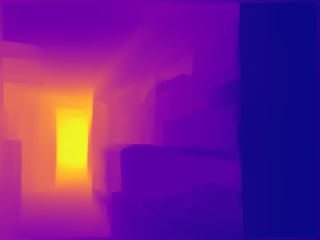

In [6]:
Image.fromarray((output * 255).astype(np.uint8)) 